<a href="https://colab.research.google.com/github/AamirJafaq/Student-Score-Prediction/blob/main/Student_Score_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

The main goal of the this task to design a linear regression model to predict the exam score based of study hours per week. This model may perform poorly because of the limited data, nonlinear relation or outliers.


In [22]:
import pandas as pd
import numpy as np

I am using colab. So, I attached a csv file with python script to upload the file. Otherwise you can upload csv file in other ways if you are using GitHub or saving file in local computer.

In [23]:
from google.colab import files
uploaded = files.upload()

Saving StudentPerformanceFactors.csv to StudentPerformanceFactors (2).csv


In [26]:
data=pd.read_csv("StudentPerformanceFactors.csv")

In [27]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [35]:
# Getting numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [45]:
# Getting categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [49]:
data.isna().sum().sort_values(ascending=False)

,0
Parental_Education_Level,90
Teacher_Quality,78
Distance_from_Home,67
Hours_Studied,0
Access_to_Resources,0
Parental_Involvement,0
Attendance,0
Extracurricular_Activities,0
Motivation_Level,0
Internet_Access,0


Note that only three columns Parental_Education_Level, Teacher_Quality and Distance_from_Home has missing values.

In this project, we need to design a linear regression to predict students' exam scores based on their study hours. Choose only relevant columns/features i.e Exam_Score and Hours_Studied.


In [68]:
df=data[["Hours_Studied", "Exam_Score"]]
df.head()

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

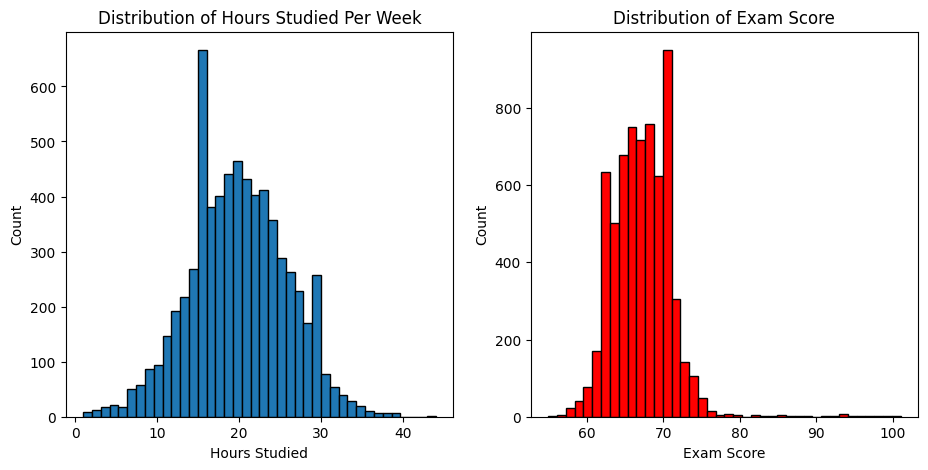

In [128]:
fig, axes=plt.subplots(1,2, figsize=(11,5))
axes[0].hist(df["Hours_Studied"], bins=40, edgecolor='black')
axes[0].set_title("Distribution of Hours Studied Per Week")
axes[0].set_xlabel("Hours Studied")
axes[0].set_ylabel("Count")
axes[1].hist(df["Exam_Score"], bins=40, edgecolor='black', color="red")
axes[1].set_title("Distribution of Exam Score")
axes[1].set_xlabel("Exam Score")
axes[1].set_ylabel("Count")

<Axes: title={'center': 'Hours Studied vs Exam Score'}, xlabel='Hours Studied Per Week', ylabel='Exam Score'>

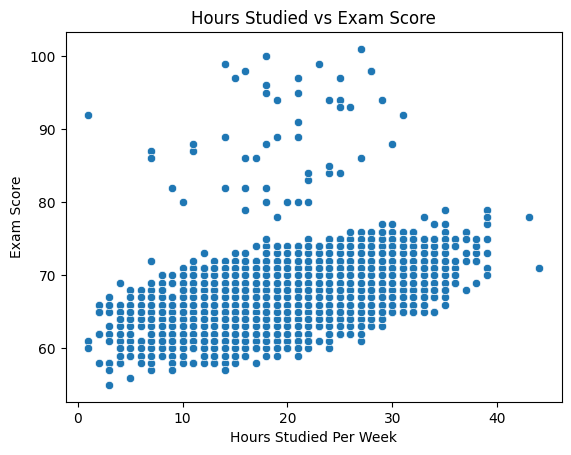

In [161]:
plt.xlabel("Hours Studied Per Week")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
sns.scatterplot(df, x="Hours_Studied", y="Exam_Score")

Observe histograms and scatter plot that the feature Hours_Studied has no potential outliers. The data is normally distributed. However, the target variable Exam_Score is skewed. It has potential outlinear, but we will not remove the outliear because it might possible in real life that students get high score eventough they study less.

In [172]:
# Getting feature column and convert it into numpy array
X=df[["Hours_Studied"]].values
X

array([[23],
       [19],
       [24],
       ...,
       [20],
       [10],
       [15]])

In [173]:
# Getting target column and convert it into numpy array
y=df[["Exam_Score"]].values
y

array([[67],
       [61],
       [74],
       ...,
       [68],
       [68],
       [64]])

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train , X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=20)

In [182]:
print(f"Training dataset size is {X_train.shape[0]}")
print(f"Training dataset size is {X_test.shape[0]}")

Training dataset size is 5285
Training dataset size is 1322


In [183]:
from sklearn.linear_model import LinearRegression

In [186]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [207]:
y_pred=model.predict(X)

Now, we will plot the actual data and the linear regression line.

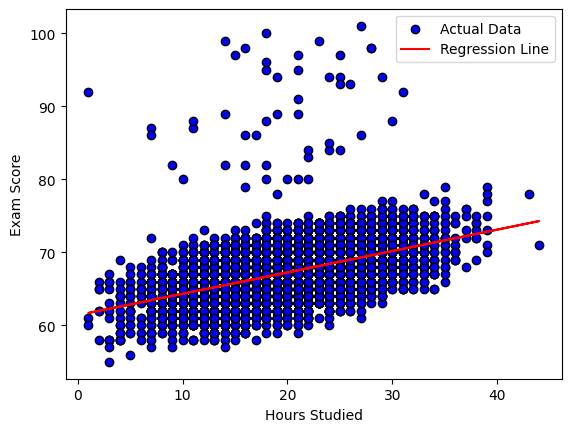

In [208]:
plt.scatter(X, y, color="blue",edgecolors="black", label="Actual Data")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.plot(X,y_pred, color="red", label="Regression Line")
plt.legend()
plt.show()

Now, we will find the metrics or errors to evaluate the performane of the model

In [205]:
from sklearn.metrics import mean_squared_error, r2_score

In [210]:
y_pred=model.predict(X_test)

In [211]:
MSE= mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

In [245]:
print("=====Linear Regression Metrics=====")
print(f"The mean squared error is {MSE:.2f}")
print(f"The R-squared score is {R2:.2f}")

=====Linear Regression Metrics=====
The mean squared error is 10.26
The R-squared score is 0.22


Note that R2 score is close to 0. It means the model performs poorly on the data. One of the reason is outliers in the target variable.

In [220]:
import joblib

In [236]:
joblib.dump(model, 'linear_model.pkl')

['linear_model.pkl']

In [237]:
loaded_model = joblib.load('linear_model.pkl')

In [240]:
X_new = pd.DataFrame([5, 10, 29])
predictions = loaded_model.predict(X_new)
predictions

array([[62.86503887],
       [64.3286808 ],
       [69.89052011]])